## Ejercicio de Feedback: Clustering

# Introducción y planteamiento del problema

"**Ayuda Internacional**" es una ONG humanitaria internacional comprometida con la lucha contra la pobreza y con proporcionar a las personas de países subdesarrollados servicios básicos y ayuda en tiempos de desastres y calamidades naturales. Esta ONG ha logrado recaudar aproximadamente 10 millones de dólares. Este dinero debe ahora asignarse de manera estratégica y eficaz. Por lo tanto, para decidir la selección de los países que más necesitan ayuda, se deben tomar decisiones basadas en datos.

En consecuencia, resulta necesario **categorizar los países utilizando factores socioeconómicos y de salud** que determinen el desarrollo general de cada país. Basándose en estos grupos de países, definidos por sus condiciones, se distribuirán los fondos para brindar asistencia durante desastres y calamidades naturales. Este es un caso claro de clustering, donde se requiere crear grupos de países basados en las diferentes características presentes.

**Objetivo**:


*   Agrupar países en función de características numéricas socioeconómicas.
*   Determinar qué grupos de países requieren ayuda y en qué grado



## Nuestro conjunto de datos




* **country**: Nombre del país.
* **child_mort**: Muertes de niños menores de 5 años por cada 1000 nacidos vivos.
* **exports**: Exportaciones de bienes y servicios per cápita, expresadas como porcentaje del PIB per cápita.
* **health**: Gasto total en salud per cápita, expresado como porcentaje del PIB per cápita.
* **imports**: Importaciones de bienes y servicios per cápita, expresadas como porcentaje del PIB per cápita.
* **Income**: Ingreso neto por persona.
* **Inflation**: Tasa de crecimiento anual del PIB total.
* **life_expec**: Número promedio de años que un recién nacido viviría si se mantienen los patrones actuales de mortalidad.
* **total_fer**: Número de hijos que nacerían por mujer si las tasas actuales de fertilidad por edad permanecen constantes.
* **gdpp**: PIB per cápita, calculado como el PIB total dividido entre la población total.




## 1 Importación de librerías

In [3]:
#Es posible que necesitéis estas librerías (y muchas más)
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly as py
import plotly.graph_objs as go
!pip install -U kaleido
import kaleido

# Librerias de uso general
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualziación de gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Clusterización
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances

## 2 Análisis Exploratorio de los datos

**Ejercicio 1** - Llevar a cabo un procedimiento de EDA para obtener información acerca de los datos:

*  Declara el tamaño del dataset y muestra algunos registros por pantalla. Muestra los estadísticos (media, desviación típica, min, max...) relevantes de cada una de las variables. Observando el tipo de características, ¿podemos usarlas todas en un algoritmo de agrupación?

*  Analiza la distribución de cada una de las variables mediante gráficas de densidad y boxplots (se valora utilizar el mínimo código posible para mostrar todas las gráficas). ¿Están bien distribuidas las variables? ¿Qué podemos comentar de este análisis?



In [4]:
# Comenzaremos extrañendo los datos del fichero
df = pd.read_csv("./Country-data.csv")
df.head(15)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [5]:
# Como tenemos una columna que no es numérica y es el nombre de los países podemos usarla como índice de cada una de las columnas para no perder
# esos datos
# Establecemos la columna 'country' como el índice
df.set_index('country', inplace=True)

# Verificación
print("Nuevos primeros registros (fíjate que 'country' ahora está en negrita a la izquierda):")
display(df.head())

# Verificamos que ahora todas las columnas del 'cuerpo' del dataset sean numéricas
print("\nTipos de datos actuales:")
print(df.dtypes)

Nuevos primeros registros (fíjate que 'country' ahora está en negrita a la izquierda):


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200



Tipos de datos actuales:
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object


In [6]:
# ESTUDIO EDA
## Se inicia con un estudio general de los datos
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

## A continuación con la función .describe() de puedne ver datos generales del conjunto de datos
print("\n--- Estadísticos Descriptivos ---")
display(df.describe()) #

# También se puede utilizar la función .info() para visualizar más datos
print("\n--- Información de tipos de variables ---")
df.info()

El dataset tiene 167 filas y 9 columnas.

--- Estadísticos Descriptivos ---


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000



--- Información de tipos de variables ---
<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


Se puede observar como ya nos indica que no existen nulos en ninguna de las columnas, por lo que el estudio de nulos se puede dar por finalizado.

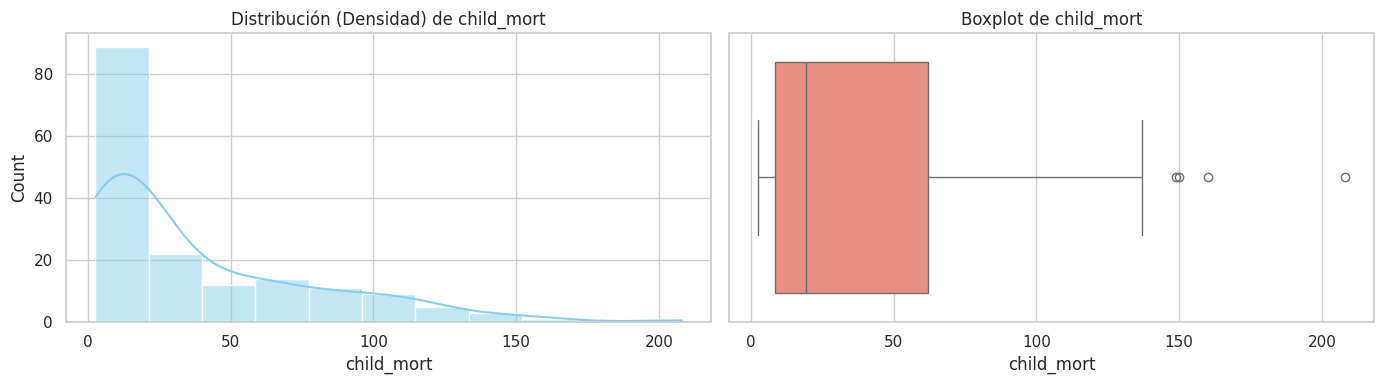

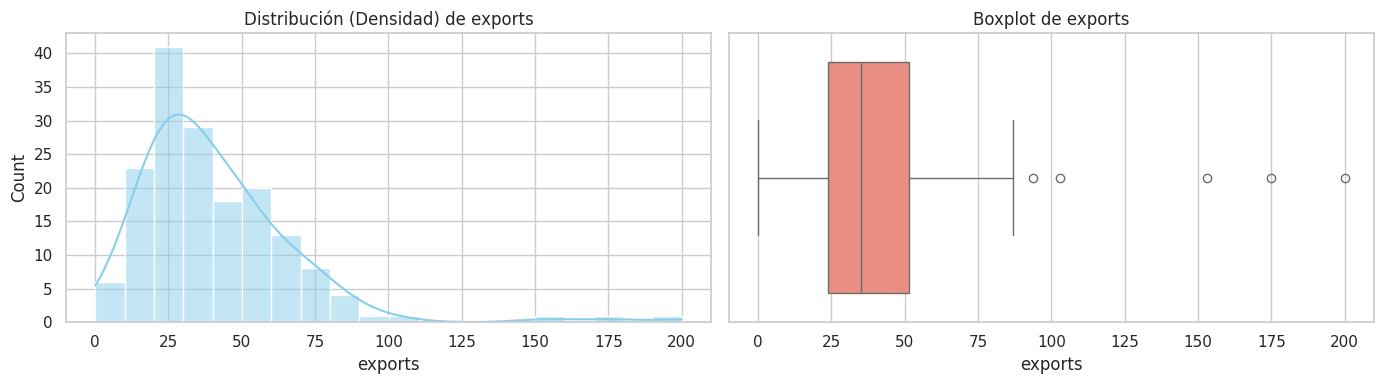

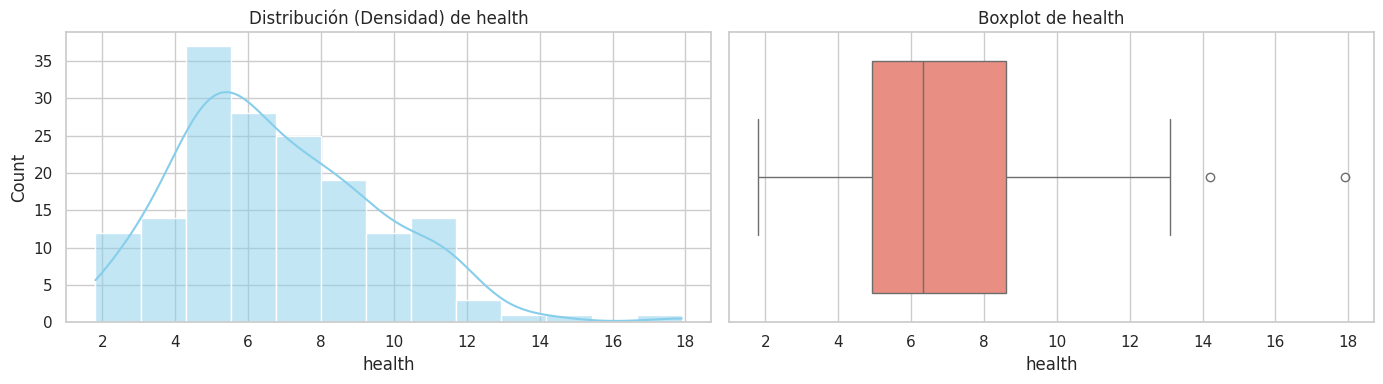

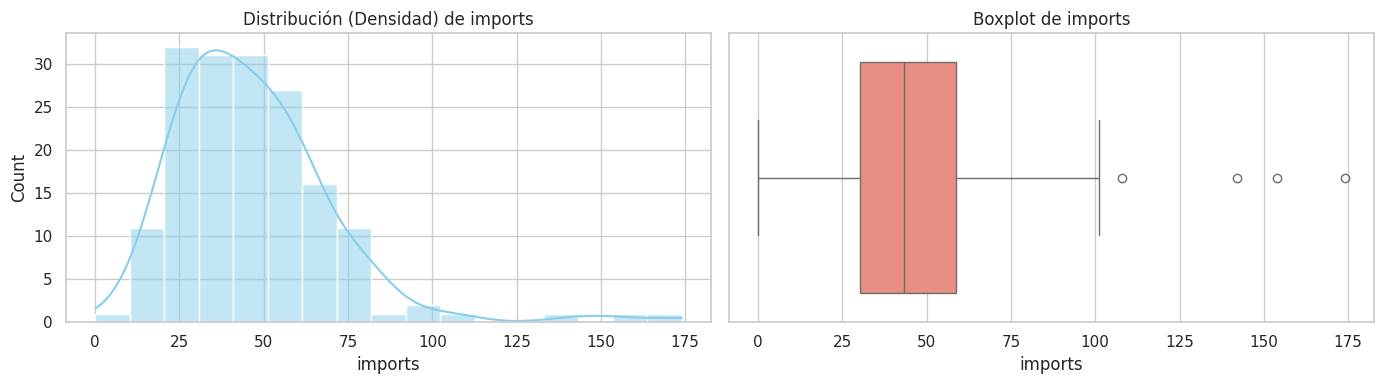

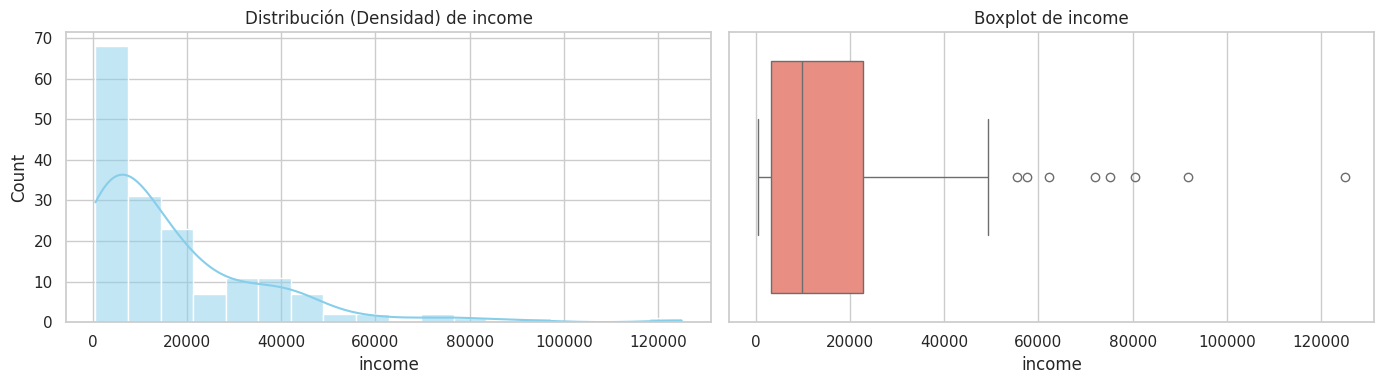

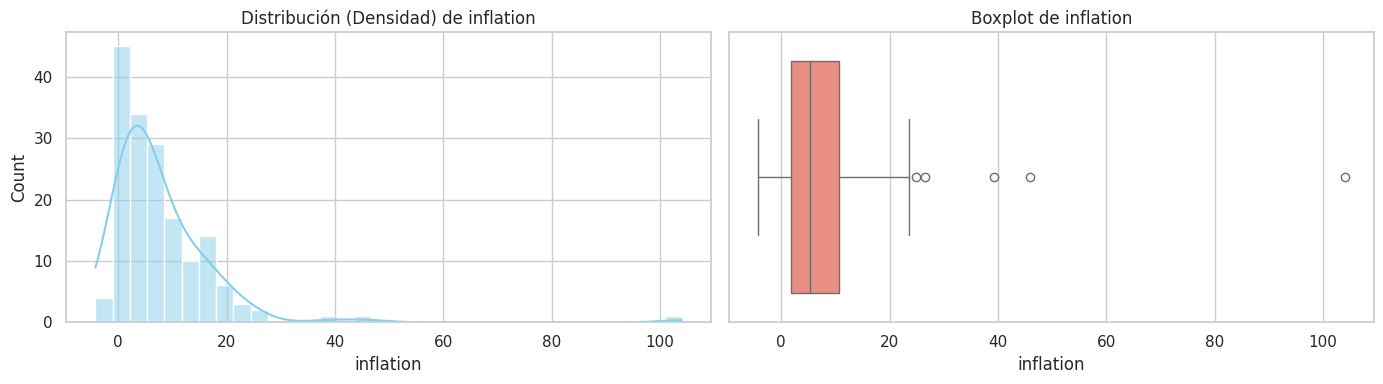

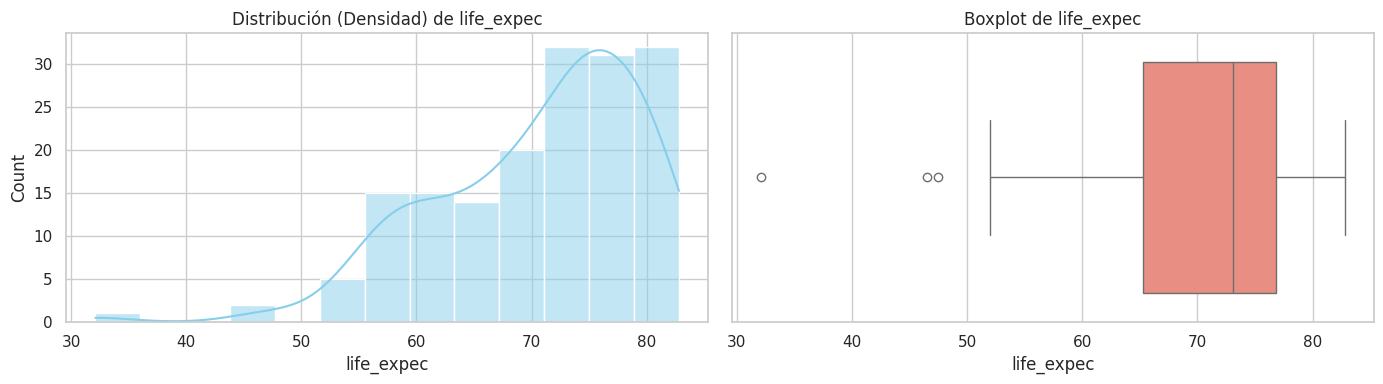

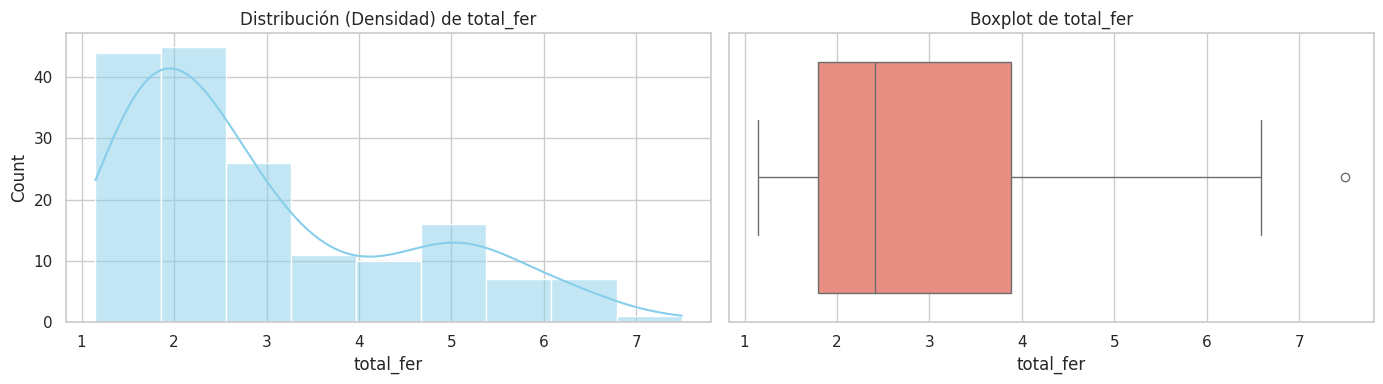

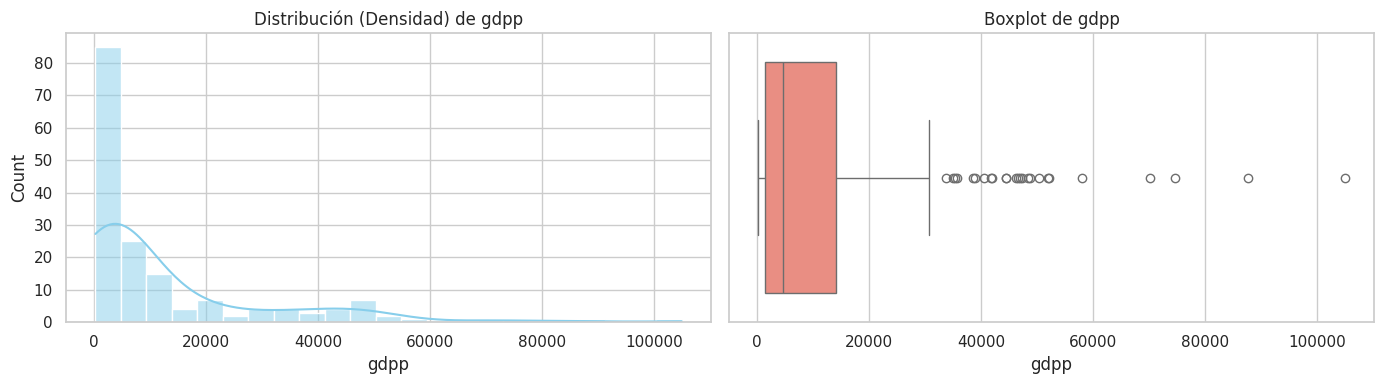

In [7]:
# A continuación es momento de gráficar:
# Configuración de estilo para que se vean profesionales
sns.set(style="whitegrid")

# Obtenemos la lista de columnas (todas son numéricas ahora)
columnas = df.columns

# Bucle for: Recorre cada columna y genera sus dos gráficos
for col in columnas:
    # Creamos un "lienzo" con 1 fila y 2 columnas de gráficos
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # Gráfico 1: Histograma con curva de densidad (KDE)
    sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribución (Densidad) de {col}')

    # Gráfico 2: Boxplot (para ver outliers)
    sns.boxplot(x=df[col], ax=axes[1], color='salmon')
    axes[1].set_title(f'Boxplot de {col}')

    # Mostramos el gráfico
    plt.tight_layout()
    plt.show()

**Conclusiones**:

Se puede observar como el Dataset carece de valores faltantes por lo que es innecesario la imputación o relleno de valores.

También a partir de la tabla y de las gráficas se puede observar como las variables funcionan en escalas completamente distintas por lo que será obligatorio una normalización/estandarización.

Se observa una marcada asimetría positiva (cola a la derecha) en variables económicas clave como *income* y *gdpp*. Esto refleja una realidad socioeconómica de alta desigualdad: la gran mayoría de los países se concentran en valores bajos de ingresos, mientras que unos pocos países "ricos" elevan la media muy por encima de la mediana.

Los diagramas de caja (boxplots) revelan la existencia de valores extremos significativos, especialmente en inflation (con máximos de +100%) y child_mort. Estos casos extremos son información valiosa para detectar países en crisis, pero requieren un manejo cuidadoso (como el escalado robusto o estandarización) para no distorsionar los centros de los clústeres.

## 3 Extracción de las características

**Ejercicio 2** - Realizaremos transformaciones en nuestros datos en crudo para obtener las variables con las que realizar el clustering.

*   Muestra la matriz de correlaciones por pantalla y comenta resumidamente sus conclusiones.

*   Vamos a **agrupar todas nuestras nueve variables en tres grandes indicadores** diferentes: **Salud** (4 variables), **Comercio** (2 variables) y **Finanzas** (3 variables). Definir las agrupaciones en base a lo que significa cada variable. Para construir cada uno de los indicadores, sumaremos cada una de las variables agrupadas en ese indicador dividida por su media (Por ejemplo: Comercio = (variable1/media_variable1) + (variable2/media_variable2)

* Una vez construidos los indicadores, tenemos que asegurarnos que los tres estén a la **misma escala**. Para ello tenemos que decidirnos por la **estandarización** o la **normalización**, ambas funciones nativas de SKLearn. Visualiza la distribución de los 3 grandes indicadores, decide que método emplear (estandarización/normalización) y aplícalo a nuestros datos.






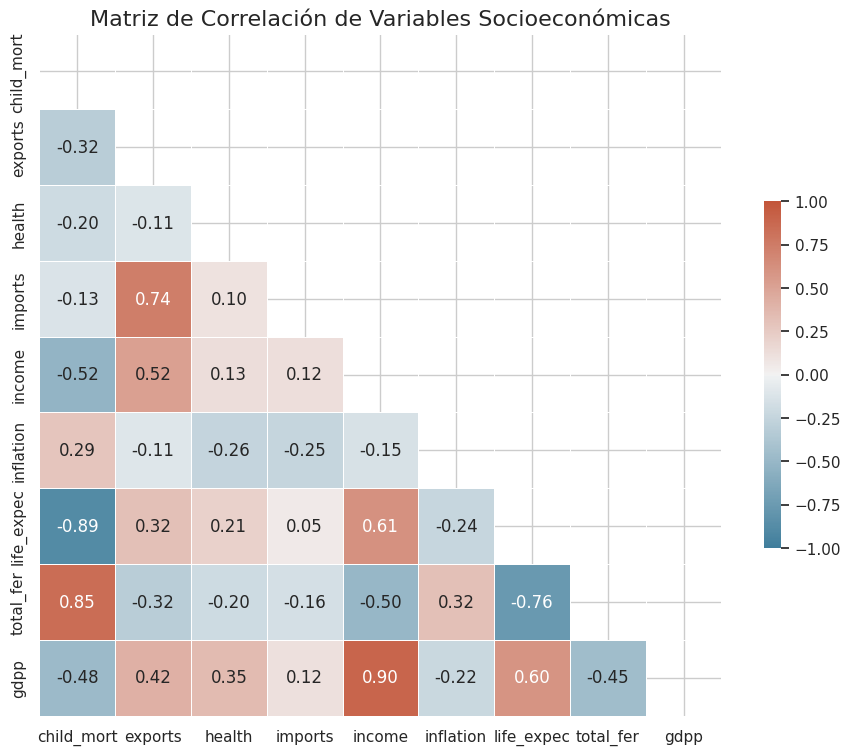

In [11]:
# Primero generaremos la matriz de correlaciones
# Utilizaremos la correlación de Pearson
corr_matrix = df.corr()

# PAra evitar que se vean dos veces las correlaciones creamos una máscara para ocultar el triángulo superior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(11, 9))

# Definimos un mapa de colores divergente (Rojo=Positivo, Azul=Negativo) para identificar visualmente rápido las relaciones fuertes
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Creación del Heatmap
sns.heatmap(corr_matrix,
            mask=mask,
            cmap=cmap,
            vmax=1, vmin=-1,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5},
            annot=True,
            fmt=".2f")

plt.title('Matriz de Correlación de Variables Socioeconómicas', fontsize=16)
plt.show()

**Conclusiones de la matriz de correlacion:**

Se puede observar como en algunas variables existe una gran correlación lo que justifica la necesidad de reducir la dimensionalidad juntanto las variables.

Un caso muy detallado es el de *gdpp* e *income*, lo cual tiene sentido debido a que las dos miden el la riqueza econóica del país.

Otro caso es el de *life_expec* con *child_mort* debido a que como es lógico si aumenta la cantidad de infantes muertos, la esperanza de vida será menor, al igual que *total_fer* con *child_mort* ya que a medida que haya más mortalidad infantil, aumenta el número de mujeres embarazadas.

In [13]:
# Calculamos las medias para usarlas más tarde, y calcularlas de una vez
means = df.mean()

# INDICADOR SALUD (Health)
# - Positivos: Esperanza de vida, Gasto en salud.
# - Negativos: Mortalidad infantil, Fertilidad (en desarrollo, alta fertilidad suele ligarse a pobreza).
df['Health_Ind'] = (df['life_expec'] / means['life_expec']) + \
                   (df['health'] / means['health']) - \
                   (df['child_mort'] / means['child_mort']) - \
                   (df['total_fer'] / means['total_fer'])

# INDICADOR COMERCIO (Trade)
# - Positivos: Importaciones y Exportaciones (mayor flujo = mayor apertura).
df['Trade_Ind'] = (df['imports'] / means['imports']) + \
                  (df['exports'] / means['exports'])

# INDICADOR FINANZAS (Finance)
# - Positivos: Ingresos (Income), PIB (GDPP).
# - Negativos: Inflación (Inflation).
df['Finance_Ind'] = (df['income'] / means['income']) + \
                    (df['gdpp'] / means['gdpp']) - \
                    (df['inflation'] / means['inflation'])

# Limpieza final
# Creamos un nuevo DataFrame 'df_model' solo con lo que necesitamos para el Clustering.
# Esto ahorra memoria y evita confusiones con las variables originales.
df_model = df[['Health_Ind', 'Trade_Ind', 'Finance_Ind']].copy()

# Verificación de resultados
print("--- Primeras filas del dataset transformado ---")
display(df_model.head())

print("\n--- Estadísticos de los nuevos indicadores ---")
display(df_model.describe())

--- Primeras filas del dataset transformado ---


,Health_Ind,Trade_Ind,Finance_Ind
country,,,
Afghanistan,-2.422504,1.200812,-1.076519
Albania,1.048966,1.717580,0.317688
Algeria,0.002385,1.603752,-0.972476
Angola,-3.929096,2.430387,-2.262080
Antigua and Barbuda,0.981553,2.362940,1.870058



--- Estadísticos de los nuevos indicadores ---


,Health_Ind,Trade_Ind,Finance_Ind
count,1.670000e+02,167.000000,167.000000
mean,7.445807e-17,2.000000,1.000000
std,1.754392e+00,1.104055,3.042769
min,-5.095854e+00,0.004057,-12.884351
25%,-1.257685e+00,1.289485,-0.638124
50%,4.549830e-01,1.783360,0.166676
75%,1.341733e+00,2.443429,2.064346
max,2.896286e+00,8.575913,12.982664


## 4 Entrenamiento y evaluación del modelo

**Ejercicio 3**: Una vez tenemos los datos estandarizados, procedemos a aplicar nuestro método de agrupación.

*  **Selección del algoritmo de clustering**: Argumentar de manera razonada, teniendo en cuenta nuestro problema concreto, que método de agrupación es mejor aplicar en este caso. Existe uno claramente diferenciado.

* **Ajuste de hiperparámetro/s**: Una vez seleccionado el modelo, ajusta los hiperparámetro/s para decidir el o los mejores valores del mismo. Recuerda utilizar todas las técnicas vistas en clase y hacer un análisis completo de la situación para poder tomar la decisión con toda la información disponible. La elección de los valor/es de los hiperparámetros deben estar justificados con gran profundidad y evidencias.

* **Evaluación de la agrupación**: Utiliza métricas vistas en clase y la representación visual de la agrupación final realizada para valorar la calidad de la misma. Usa las librerías 2D y 3D vistas en las prácticas.





## 5 Análisis de resultados y conclusión del problema.

**Ejercicio 4**: Interpretar y explicar los resultados obtenidos en base a nuestro problema concreto.

* Desde la ONG se tiene conocimiento de que las variables más representativas para decidir si un país necesita o no ayuda son el ingreso neto (income) y la mortalidad infantil (child_mort). Dibuja un boxplot de ambas variables respecto a los clústeres etiquetados para determinar el nivel de ayuda para cada uno de los diferentes grupos. **Nota**: Si hemos obtenido dos clústers finales, los niveles de ayuda serán (necesita ayuda/no necesita ayuda), si son 3 (no necesita ayuda / necesita ayuda moderada/ necesita mucha ayuda) y así sucesivamente.

*   Utilizando la librería *kaileido* y *plotly.express* **dibuja un mapa mundi** dónde se refleje el nivel de ayuda necesario por país en función de los clústeres realizados. Que cada nivel de ayuda (clúster) tenga un color diferente.


*   **Conclusiones**: En función de nuestro análisis, ¿qué países debería priorizar Ayuda Internacional para depositar su ayuda y sus recursos? ¿Qué mejoras o implementaciones podríamos hacer a este análisis para mejorar sus resultados? Razona las respuestas de manera argumentada.